In [ ]:
# Plotting libraries
from matplotlib.pyplot import plot as plt
from matplotlib.pyplot import figure as fig# For basic plots and figures
import matplotlib.ticker as mtick  # For formatting axes in matplotlib
import seaborn as sns  # For advanced statistical plotting

# Data handling
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from numpy import math  # math functions from NumPy (use standard math instead usually)

# Date and time
from datetime import datetime  # For handling date and time

# Plotly (interactive visualizations)
import plotly.graph_objects as go  # Low-level plotting
import plotly.express as px  # High-level, simple interface for Plotly
from plotly.subplots import make_subplots  # For subplot creation
from plotly.offline import init_notebook_mode, iplot  # For offline mode in Jupyter
import plotly.offline as po
import plotly.io as pio  # Plotly input/output operations

# Text and data preprocessing
from collections import Counter  # Count frequency of elements
from sklearn import preprocessing  # Preprocessing tools like label encoding, scaling
from sklearn.feature_extraction.text import TfidfVectorizer  # For transforming text to TF-IDF features

# Model selection (NOTE: you had a typo here!)
from sklearn.model_selection import train_test_split, KFold  # Corrected "model_selction" to "model_selection"

# Dimensionality reduction
from sklearn.decomposition import PCA  # Principal Component Analysis

# NLP
from nltk.corpus import stopwords  # You had a typo here
from nltk.stem import SnowballStemmer  # Corrected "SnowballSteammer"



C:\Users\samiwadho\AppData\Local\Temp\ipykernel_5804\3109086315.py:10: DeprecationWarning:

`np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`



# step 1 Data Loading

In [7]:
stream_net = pd.read_csv("netflix_titles.csv")
stream_net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
stream_net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
stream_net.description

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

In [11]:
stream_net.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

# step 2 preproccessing 


In [12]:
stream_net.isnull().count()

show_id         8807
type            8807
title           8807
director        8807
cast            8807
country         8807
date_added      8807
release_year    8807
rating          8807
duration        8807
listed_in       8807
description     8807
dtype: int64

In [15]:
stream_net.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
stream_net.index

RangeIndex(start=0, stop=8807, step=1)

In [17]:
stream_net.shape

(8807, 12)

In [19]:
stream_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
# Checking Duplic

stream_net.duplicated().sum()

0

In [ ]:
#Missing Valuees Count
stream_net.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [24]:
#total null value 

stream_net.isna().sum().sum()

4307

C:\Users\samiwadho\AppData\Local\Temp\ipykernel_5804\1273682132.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




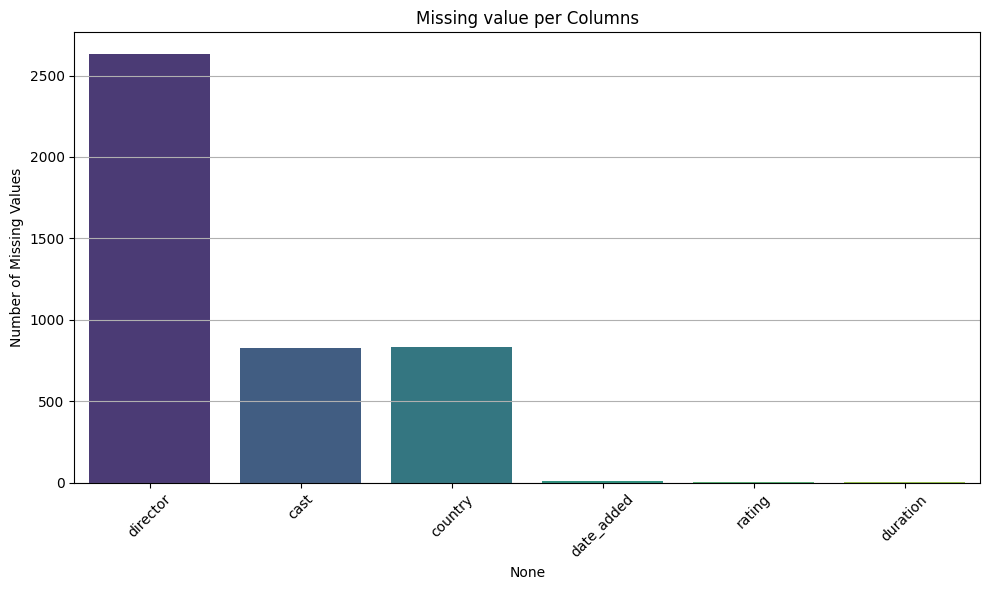

In [44]:
# Visializing the missing value
missing = stream_net.isnull().sum()
missing = missing[missing>0]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x =missing.index,y =missing.values,palette ="viridis")
plt.title("Missing value per Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [46]:
#Handling those missing values
stream_net['director'].fillna(value="Not Found director", inplace=True)

# Use mode of existing column, not a typo column name
stream_net['cast'].fillna(value=stream_net['cast'].mode()[0], inplace=True)

stream_net['country'].fillna(value=stream_net['country'].mode()[0], inplace=True)

# Fix typo: it's likely 'date_added' not 'data_added' or anything else
stream_net['date_added'].fillna(value=stream_net['date_added'].mode()[0], inplace=True)

stream_net['rating'].fillna(value="Not Found rating", inplace=True)

stream_net['duration'].fillna(value="Not Found duration", inplace=True)


C:\Users\samiwadho\AppData\Local\Temp\ipykernel_5804\2744124904.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\samiwadho\AppData\Local\Temp\ipykernel_5804\2744124904.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [47]:
stream_net.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [49]:
stream_net.shape

(8807, 12)

# step 3 Vizualiaztion

In [63]:
# there are two type in dataset 1. TV shows ,2. Movies
labels = ['TV Show', 'Movies']
values =[stream_net.type.value_counts([1],stream_net.type.value_counts()[0])]

# Step 2: Create donut chart hole=0.6 makes it a donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6)])


fig.update_layout( title_text='Type of Content Watched on Netflix')


C:\Users\samiwadho\AppData\Local\Temp\ipykernel_5804\1928913937.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [66]:
from IPython.display import Image
img_bytes = fig.to_image(format = "jpeg")
Image(img_bytes)

ValueError: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido


In [65]:
pip install --upgrade kaleido


   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
   ---------------------------------------- 0/5 [simplejson]
  Attempting uninstall: orjson
   ---------------------------------------- 0/5 [simplejson]
    Found existing installation: orjson 3.10.3
   ---------------------------------------- 0/5 [simplejson]
    Uninstalling orjson-3.10.3:
   ---------------------------------------- 0/5 [simplejson]
      Successfully uninstalled orjson-3.10.3
   ---------------------------------------- 0/5 [simplejson]
   -------- ------------------------------- 1/5 [orjson]
   -------- ------------------------------- 1/5 [orjson]
   -------- ------------------------------- 1/5 [orjson]
   -------- ------------------------------- 1/5 [orjson]
   -------- ------------------------------- 1/5 [orjson]
   -------

  You can safely remove it manually.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
pip install --upgrade 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: You must give at least one requirement to install (see "pip help install")
